In [2]:
#Q3 -> 1. 

import os

# Set the path to the directory where the files are stored
data_dir = "./languageID"

# Get the list of filenames in the directory
file_list = os.listdir(data_dir)

# Filter files for the training set (0.txt to 9.txt for each language)
train_files = [file for file in file_list if file[1:4] == '.txt' and int(file[2:4]) <= 9]

# Count the number of documents for each language
lang_counts = {'e': 0, 'j': 0, 's': 0}
for file in train_files:
    lang = file[0]
    lang_counts[lang] += 1

# Calculate the prior probabilities using additive smoothing
alpha = 0.5
total_docs = sum(lang_counts.values())
k = len(lang_counts)

priors = {}
for lang, count in lang_counts.items():
    priors[lang] = (count + alpha) / (total_docs + k*alpha)

print(priors)


{'e': 0.3333333333333333, 'j': 0.3333333333333333, 's': 0.3333333333333333}


In [3]:
#Q3 -> 2. & 3.

import string
import os

def calculate_theta(docs, alpha=0.5):
    # Initialize the counts for all characters to alpha (additive smoothing)
    char_counts = {char: alpha for char in string.ascii_lowercase + ' '}
    
    # Total number of characters in the documents
    total_chars = 0

    # Count the characters
    for doc in docs:
        for char in doc:
            if char in char_counts:
                char_counts[char] += 1
                total_chars += 1

    # Calculate the probabilities using the additive smoothing formula
    d = 27  # Vocabulary size
    theta = [(count / (total_chars + alpha * d)) for count in char_counts.values()]
    
    return theta

# Directory where the files are located
directory_path = 'languageID/'

# Read in English training documents
english_docs = []
japanese_docs = []
spanish_docs = []
for i in range(10):
    with open(os.path.join(directory_path, f'e{i}.txt'), 'r') as file:
        english_docs.append(file.read())
    with open(os.path.join(directory_path, f'j{i}.txt'), 'r') as file:
        japanese_docs.append(file.read())
    with open(os.path.join(directory_path, f's{i}.txt'), 'r') as file:
        spanish_docs.append(file.read())

theta_e = calculate_theta(english_docs)
theta_j = calculate_theta(japanese_docs)
theta_s = calculate_theta(spanish_docs)

print("Theta_e:")
for prob in theta_e:
    print(f"{prob:.4f}")
    
print("\nTheta_j:")
for prob in theta_j:
    print(f"{prob:.4f}")
    
print("\nTheta_s:")
for prob in theta_s:
    print(f"{prob:.4f}")


Theta_e:
0.0602
0.0111
0.0215
0.0220
0.1054
0.0189
0.0175
0.0472
0.0554
0.0014
0.0037
0.0290
0.0205
0.0579
0.0645
0.0168
0.0006
0.0538
0.0662
0.0801
0.0267
0.0093
0.0155
0.0012
0.0138
0.0006
0.1792

Theta_j:
0.1318
0.0109
0.0055
0.0172
0.0602
0.0039
0.0140
0.0318
0.0970
0.0023
0.0574
0.0014
0.0398
0.0567
0.0912
0.0009
0.0001
0.0428
0.0422
0.0570
0.0706
0.0002
0.0197
0.0000
0.0142
0.0077
0.1234

Theta_s:
0.1046
0.0082
0.0375
0.0397
0.1138
0.0086
0.0072
0.0045
0.0499
0.0066
0.0003
0.0529
0.0258
0.0542
0.0725
0.0243
0.0077
0.0593
0.0658
0.0356
0.0337
0.0059
0.0001
0.0025
0.0079
0.0027
0.1683


In [4]:
# Q3 -> 4.

# Define the vocabulary
vocabulary = list("abcdefghijklmnopqrstuvwxyz ")
vocab_size = len(vocabulary)

# Initialize the dictionary with zero counts for each character
char_count = {char: 0 for char in vocabulary}

# Read the file and update the counts
with open("languageID/e10.txt", "r") as file:
    for line in file:
        for char in line:
            if char in char_count:
                char_count[char] += 1

# Convert the dictionary to a list to represent the vector
bow_vector = [char_count[char] for char in vocabulary]

print(bow_vector)

[164, 32, 53, 57, 311, 55, 51, 140, 140, 3, 6, 85, 64, 139, 182, 53, 3, 141, 186, 225, 65, 31, 47, 4, 38, 2, 498]


In [5]:
# Q3 -> 5.
import numpy as np

def compute_log_likelihood(x, theta_y):
    log_likelihood = np.sum([x[i] * np.log(theta_y[i]) for i in range(len(x))])
    return log_likelihood

# Bag-of-words count vector for the test document 'e10.txt'
x = bow_vector

# Compute likelihood for English
log_likelihood_english = compute_log_likelihood(x, theta_e)
log_likelihood_japanese = compute_log_likelihood(x, theta_j)
log_likelihood_spanish = compute_log_likelihood(x, theta_s)
print(f"Log Likelihood for English: {log_likelihood_english}")
print(f"Log Likelihood for Japanese: {log_likelihood_japanese}")
print(f"Log Likelihood for Spanish: {log_likelihood_spanish}")

Log Likelihood for English: -7841.865447060635
Log Likelihood for Japanese: -8771.433079075032
Log Likelihood for Spanish: -8467.282044010557


In [6]:
# Q3 -> 7.
import os
import glob
from collections import defaultdict

# Load Data
def load_data(folder):
    docs = []
    for filename in glob.glob(os.path.join(folder, '*.txt')):
        with open(filename, 'r', encoding='utf-8') as f:
            text = f.read().lower()
            # Remove characters that are not in our vocabulary
            text = ''.join([c for c in text if 'a' <= c <= 'z' or c == ' '])
            label = os.path.basename(filename)[0]  # Extracting the first character of filename as label
            docs.append((label, text))
    return docs

# Training the Naive Bayes Classifier
def train(docs):
    total_docs = len(docs)
    char_counts = defaultdict(lambda: defaultdict(int))
    lang_counts = defaultdict(int)
    
    for label, text in docs:
        lang_counts[label] += 1
        for char in text:
            char_counts[char][label] += 1

    # Calculate likelihoods and priors
    likelihoods = defaultdict(lambda: defaultdict(float))
    priors = {}
    
    for char, lang_dict in char_counts.items():
        for lang, count in lang_dict.items():
            likelihoods[char][lang] = (count + 1) / (sum(lang_dict.values()) + 27)  # +27 for smoothing

    for lang, count in lang_counts.items():
        priors[lang] = count / total_docs
    
    return likelihoods, priors

# Testing the Classifier
def classify(text, likelihoods, priors):
    scores = {}
    for lang, prior in priors.items():
        scores[lang] = prior
        for char in text:
            scores[lang] *= likelihoods[char][lang]
    return max(scores, key=scores.get)

# Loading dataset and split it into training and test sets
docs = load_data('languageID')
train_docs = [doc for idx, doc in enumerate(docs) if idx % 20 < 10]  # Take the first 10 out of every 20 for training
test_docs = [doc for idx, doc in enumerate(docs) if idx % 20 >= 10]  # Take the next 10 out of every 20 for testing

likelihoods, priors = train(train_docs)

# Predict and construct the confusion matrix
confusion_matrix = defaultdict(lambda: defaultdict(int))
for true_label, text in test_docs:
    predicted_label = classify(text, likelihoods, priors)
    confusion_matrix[true_label][predicted_label] += 1

# Print the confusion matrix
for true_label, predictions in confusion_matrix.items():
    print(f"True label: {true_label}")
    for predicted_label, count in predictions.items():
        print(f"Predicted {predicted_label}: {count}")
    print()


True label: e
Predicted e: 10

True label: j
Predicted e: 10

True label: s
Predicted e: 10



In [1]:
#Q4 -> 2.

# Data loading
import numpy as np
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
train_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
test_dataset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

print(len(train_dataset))
print(len(test_dataset))

# Convert PyTorch tensors to numpy arrays
#conver training image data from a set of 28x28 pixel image in range [0,255]...
#...to a set of flattened vector of length 784 in range [0,1]
x_train = train_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_train = train_dataset.targets.numpy()
x_test = test_dataset.data.numpy().reshape(-1, 28*28) / 255.0
y_test = test_dataset.targets.numpy()

# # Assuming image_matrix is a numpy array or a PyTorch tensor
# plt.imshow(x_train[2], cmap='gray')  # use cmap='gray' for grayscale images
# plt.axis('off')  # to turn off the axis numbers
# plt.show()

# One-hot encode labels
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

60000
10000


In [2]:
# Neural Network Implementation:

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / exp_x.sum(axis=1, keepdims=True)

# Initialize weights
input_dim = 28 * 28
hidden_dim = 300
output_dim = 10
lr = 0.01

# Initilizing weights randomly
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)

# Forward and backward pass
def forward_backward_pass(X, Y):
    # Forward pass
    a = np.dot(X, W1)
    z = sigmoid(a)
    b = np.dot(z, W2)
    y_hat = softmax(b)
    
    # Loss
    m = X.shape[0]
    loss = -np.sum(Y * np.log(y_hat)) / m
    
    # Backward pass
    db = y_hat - Y
    dW2 = np.dot(z.T, db)
    
    dz = np.dot(db, W2.T)
    da = dz * sigmoid_derivative(z)
    dW1 = np.dot(X.T, da)
    
    return dW1, dW2, loss


# Evaluation

def predict(X):
    a = np.dot(X, W1)
    z = sigmoid(a)
    b = np.dot(z, W2)
    y_hat = softmax(b)
    return np.argmax(y_hat, axis=1)

def evaluate(X, Y):
    y_pred = predict(X)
    correct_predictions = np.sum(y_pred == np.argmax(Y, axis=1))
    total_predictions = X.shape[0]
    accuracy = correct_predictions / total_predictions
    return accuracy

def compute_loss(X, Y):
    # Forward pass
    a = np.dot(X, W1)
    z = sigmoid(a)
    b = np.dot(z, W2)
    y_hat = softmax(b)
    
    # Loss computation
    m = X.shape[0]
    loss = -np.sum(Y * np.log(y_hat )) / m

    return loss

print(x_train.shape)

(60000, 784)


In [3]:
# Training and testing for each epoch

epochs = 25
batch_size = 64
train_losses = []
test_errors = []
test_losses = []

for epoch in range(epochs):
    total_loss = 0
    for i in range(0, x_train.shape[0], batch_size):
        X_batch = x_train[i:i+batch_size]
        Y_batch = y_train[i:i+batch_size]
        
        dW1, dW2, loss = forward_backward_pass(X_batch, Y_batch)
        
        # Update weights
        W1 -= lr * dW1
        W2 -= lr * dW2
        
        total_loss += loss

    avg_loss = total_loss / (x_train.shape[0] // batch_size)
    train_losses.append(avg_loss)
    
    test_error = 1 - evaluate(x_test, y_test)
    test_errors.append(test_error)
    
    test_loss = compute_loss(x_test, y_test)
    test_losses.append(test_loss)
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}, Test Error: {test_error*100:.2f}%, Test Loss: {test_loss}")


Epoch 1, Loss: 0.963374583585997, Test Error: 9.28%, Test Loss: 0.43575552043374743
Epoch 2, Loss: 0.3340972699514583, Test Error: 7.92%, Test Loss: 0.33255587005201104
Epoch 3, Loss: 0.2266549567129459, Test Error: 7.31%, Test Loss: 0.2915895345232836
Epoch 4, Loss: 0.1709272512102989, Test Error: 7.04%, Test Loss: 0.2706620028000361
Epoch 5, Loss: 0.1358090474686067, Test Error: 6.78%, Test Loss: 0.25818181334028234
Epoch 6, Loss: 0.11139652320135535, Test Error: 6.53%, Test Loss: 0.24954992130799064
Epoch 7, Loss: 0.09342204766625616, Test Error: 6.32%, Test Loss: 0.24221160591552776
Epoch 8, Loss: 0.07961059999198188, Test Error: 6.09%, Test Loss: 0.23572362481264236
Epoch 9, Loss: 0.06860420851509165, Test Error: 5.93%, Test Loss: 0.23045632431314061
Epoch 10, Loss: 0.059583016703777775, Test Error: 5.75%, Test Loss: 0.22640269235268978
Epoch 11, Loss: 0.05205004539217337, Test Error: 5.58%, Test Loss: 0.22328523558956317
Epoch 12, Loss: 0.04569348998226172, Test Error: 5.49%, Tes

Test Accuracy: 95.23%


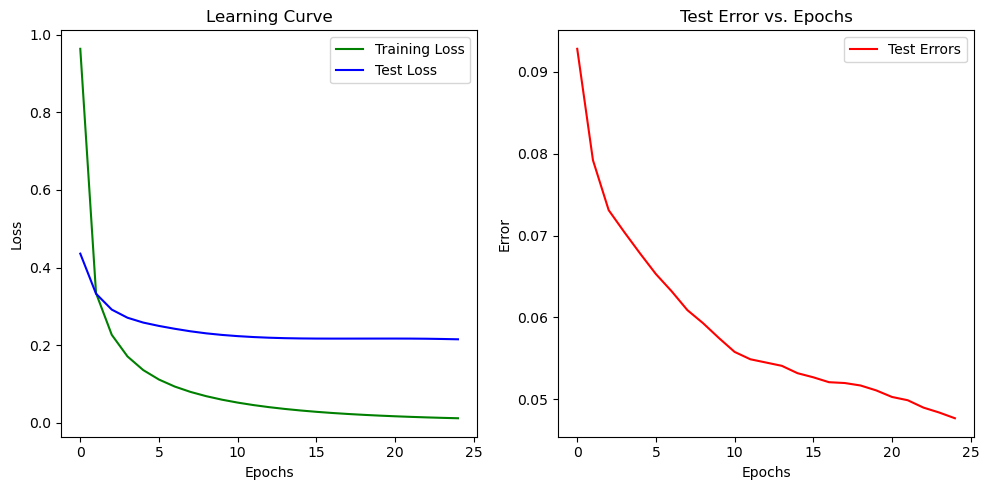

In [4]:
#Plots for learning curve and test errors

accuracy = 1-test_error
print(f"Test Accuracy: {accuracy*100:.2f}%")

import matplotlib.pyplot as plt

# Plot training loss and test loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss', color = 'g')
plt.plot(range(epochs), test_losses, label='Test Loss', color = 'b')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot test errors
plt.subplot(1, 2, 2)
plt.plot(range(epochs), test_errors, label='Test Errors', color='r')
plt.title('Test Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
# Q4 -> 3.

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.init as init

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
#         x = self.softmax(x)
        return x


In [2]:
# Hyperparameters
input_dim = 784
hidden_dim = 300
output_dim = 10
learning_rate = 0.01
epochs = 60
batch_size = 64

# Data loaders
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

def init_weights_zero(m):
        if type(m) == nn.Linear:
            m.weight.data.fill_(0.0)
            m.bias.data.fill_(0.0)
            
def init_weights_random(m):
    if type(m) == nn.Linear:
        init.uniform_(m.weight, a=-1, b=1)  # Randomly initialize weights between -1 and 1
        if m.bias is not None:
            init.uniform_(m.bias, a=-1, b=1)  # Randomly initialize bias between -1 and 1 if bias exists

# Initialize the neural network and define the loss and optimizer
model = NeuralNet(input_dim, hidden_dim, output_dim)
# model.apply(init_weights_zero)  # Uncomment and run for Question 4.4.a
# model.apply(init_weights_random) # Uncomment and run for Question 4.4.b
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum = 0)

# Train the model
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    model.train()  # Set the model to training mode
    for i, (images, labels) in enumerate(train_loader):
        # Flatten the images
        images = images.view(-1, 28*28)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        # Calculate correct predictions for training accuracy
        _, train_predicted = torch.max(outputs.data, 1)
        train_correct += (train_predicted == labels).sum().item()
        train_total += labels.size(0)

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * train_correct / train_total  # Calculate training accuracy over all data
    train_accuracies.append(train_accuracy)

    # Testing loop for each epoch
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation for testing
        for images, labels in test_loader:
            images = images.view(-1, 28*28)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)
    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)
    
    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")


Epoch [1/60], Train Loss: 2.5828, Test Loss: 1.2444, Train Accuracy: 41.77%, Test Accuracy: 64.55%
Epoch [2/60], Train Loss: 1.0468, Test Loss: 0.8382, Train Accuracy: 69.80%, Test Accuracy: 75.06%
Epoch [3/60], Train Loss: 0.7926, Test Loss: 0.6890, Train Accuracy: 76.88%, Test Accuracy: 79.52%
Epoch [4/60], Train Loss: 0.6752, Test Loss: 0.6066, Train Accuracy: 80.16%, Test Accuracy: 82.09%
Epoch [5/60], Train Loss: 0.6038, Test Loss: 0.5514, Train Accuracy: 82.18%, Test Accuracy: 83.69%
Epoch [6/60], Train Loss: 0.5546, Test Loss: 0.5114, Train Accuracy: 83.66%, Test Accuracy: 84.83%
Epoch [7/60], Train Loss: 0.5179, Test Loss: 0.4812, Train Accuracy: 84.70%, Test Accuracy: 85.76%
Epoch [8/60], Train Loss: 0.4881, Test Loss: 0.4585, Train Accuracy: 85.52%, Test Accuracy: 86.56%
Epoch [9/60], Train Loss: 0.4639, Test Loss: 0.4397, Train Accuracy: 86.26%, Test Accuracy: 87.09%
Epoch [10/60], Train Loss: 0.4436, Test Loss: 0.4219, Train Accuracy: 86.81%, Test Accuracy: 87.56%
Epoch [11

In [3]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the model on the 10000 test images: 93.01 %


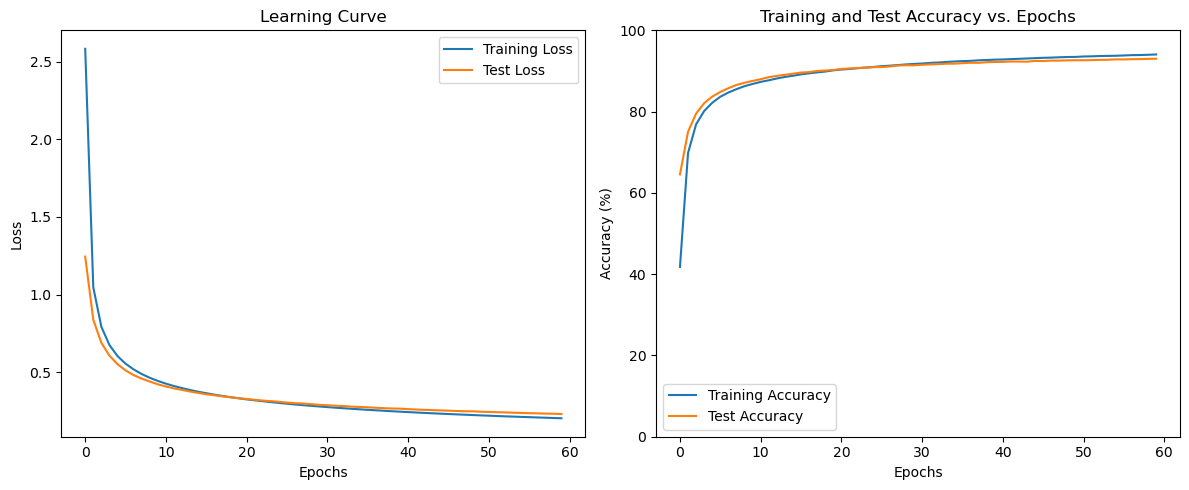

In [4]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses , label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, label='Training Accuracy')
plt.plot(range(epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.ylim(0,100)
plt.legend()
plt.title('Training and Test Accuracy vs. Epochs')
plt.tight_layout()
plt.show()


In [ ]:
# Outputs for 4.2 implementation :
# Epoch: 25, LR: 0.01, Batch: 64
'''
Test Accuracy: 95.93%

Epoch 1, Loss: 0.8559484664225033, Test Error: 10.60%, Test Loss: 0.5114992568113094
Epoch 2, Loss: 0.3343276470294684, Test Error: 8.68%, Test Loss: 0.3768122001507692
Epoch 3, Loss: 0.227792057082367, Test Error: 7.81%, Test Loss: 0.32563794582220446
Epoch 4, Loss: 0.1730715154135165, Test Error: 7.20%, Test Loss: 0.29184282537617723
Epoch 5, Loss: 0.1385281955719691, Test Error: 6.84%, Test Loss: 0.26873095904303235
Epoch 6, Loss: 0.11446794016753266, Test Error: 6.56%, Test Loss: 0.2550889820454381
Epoch 7, Loss: 0.09660978856100337, Test Error: 6.36%, Test Loss: 0.2468028020777326
Epoch 8, Loss: 0.08263608830358572, Test Error: 6.21%, Test Loss: 0.24163843311161404
Epoch 9, Loss: 0.07134603904375814, Test Error: 6.03%, Test Loss: 0.23748881697056368
Epoch 10, Loss: 0.0620198770327648, Test Error: 5.98%, Test Loss: 0.23379141108286894
Epoch 11, Loss: 0.05421949675074148, Test Error: 5.95%, Test Loss: 0.23068044317529252
Epoch 12, Loss: 0.04763661688908432, Test Error: 5.79%, Test Loss: 0.2281200063628971
Epoch 13, Loss: 0.04203116935489322, Test Error: 5.69%, Test Loss: 0.22602538084020415
Epoch 14, Loss: 0.03723040303913299, Test Error: 5.61%, Test Loss: 0.22439917082332914
Epoch 15, Loss: 0.03308326965594298, Test Error: 5.49%, Test Loss: 0.2231505290800226
Epoch 16, Loss: 0.029472504630932664, Test Error: 5.42%, Test Loss: 0.222142562671598
Epoch 17, Loss: 0.026320922646280238, Test Error: 5.36%, Test Loss: 0.22128860099023467
Epoch 18, Loss: 0.02357417074771956, Test Error: 5.30%, Test Loss: 0.22051147495037876
Epoch 19, Loss: 0.021183307874318463, Test Error: 5.30%, Test Loss: 0.2197865757833087
Epoch 20, Loss: 0.019103652930026964, Test Error: 5.25%, Test Loss: 0.21911594627382447
Epoch 21, Loss: 0.017293539495879397, Test Error: 5.19%, Test Loss: 0.21849218485916616
Epoch 22, Loss: 0.015713432961963314, Test Error: 5.15%, Test Loss: 0.2179073102857365
Epoch 23, Loss: 0.014329439847256854, Test Error: 5.12%, Test Loss: 0.21734883780326186
Epoch 24, Loss: 0.013113121811372015, Test Error: 5.07%, Test Loss: 0.21680060814107574
Epoch 25, Loss: 0.012040985261785623, Test Error: 5.07%, Test Loss: 0.21625523304755512
'''

In [ ]:
# Outputs for 4.3:
# Epoch: 60, LR: 0.01, Batch: 64

'''
Test Accuracy: 92.62 %

Epoch [1/60], Train Loss: 2.1219, Test Loss: 1.8607, Train Accuracy: 42.23%, Test Accuracy: 60.05%
Epoch [2/60], Train Loss: 1.5300, Test Loss: 1.1968, Train Accuracy: 70.62%, Test Accuracy: 77.06%
Epoch [3/60], Train Loss: 1.0122, Test Loss: 0.8349, Train Accuracy: 79.56%, Test Accuracy: 82.66%
Epoch [4/60], Train Loss: 0.7593, Test Loss: 0.6617, Train Accuracy: 83.24%, Test Accuracy: 85.18%
Epoch [5/60], Train Loss: 0.6299, Test Loss: 0.5662, Train Accuracy: 85.18%, Test Accuracy: 86.79%
Epoch [6/60], Train Loss: 0.5535, Test Loss: 0.5050, Train Accuracy: 86.42%, Test Accuracy: 87.59%
Epoch [7/60], Train Loss: 0.5030, Test Loss: 0.4639, Train Accuracy: 87.24%, Test Accuracy: 88.16%
Epoch [8/60], Train Loss: 0.4675, Test Loss: 0.4341, Train Accuracy: 87.87%, Test Accuracy: 88.82%
Epoch [9/60], Train Loss: 0.4409, Test Loss: 0.4118, Train Accuracy: 88.43%, Test Accuracy: 89.14%
Epoch [10/60], Train Loss: 0.4207, Test Loss: 0.3937, Train Accuracy: 88.73%, Test Accuracy: 89.53%
Epoch [11/60], Train Loss: 0.4047, Test Loss: 0.3805, Train Accuracy: 88.99%, Test Accuracy: 89.79%
Epoch [12/60], Train Loss: 0.3915, Test Loss: 0.3685, Train Accuracy: 89.26%, Test Accuracy: 89.86%
Epoch [13/60], Train Loss: 0.3806, Test Loss: 0.3591, Train Accuracy: 89.47%, Test Accuracy: 90.02%
Epoch [14/60], Train Loss: 0.3713, Test Loss: 0.3504, Train Accuracy: 89.66%, Test Accuracy: 90.07%
Epoch [15/60], Train Loss: 0.3633, Test Loss: 0.3440, Train Accuracy: 89.78%, Test Accuracy: 90.17%
Epoch [16/60], Train Loss: 0.3564, Test Loss: 0.3375, Train Accuracy: 89.94%, Test Accuracy: 90.39%
Epoch [17/60], Train Loss: 0.3502, Test Loss: 0.3323, Train Accuracy: 90.09%, Test Accuracy: 90.37%
Epoch [18/60], Train Loss: 0.3450, Test Loss: 0.3280, Train Accuracy: 90.25%, Test Accuracy: 90.69%
Epoch [19/60], Train Loss: 0.3401, Test Loss: 0.3236, Train Accuracy: 90.33%, Test Accuracy: 90.66%
Epoch [20/60], Train Loss: 0.3355, Test Loss: 0.3195, Train Accuracy: 90.41%, Test Accuracy: 90.93%
Epoch [21/60], Train Loss: 0.3314, Test Loss: 0.3165, Train Accuracy: 90.53%, Test Accuracy: 90.97%
Epoch [22/60], Train Loss: 0.3277, Test Loss: 0.3122, Train Accuracy: 90.65%, Test Accuracy: 90.99%
Epoch [23/60], Train Loss: 0.3245, Test Loss: 0.3102, Train Accuracy: 90.72%, Test Accuracy: 91.11%
Epoch [24/60], Train Loss: 0.3211, Test Loss: 0.3081, Train Accuracy: 90.78%, Test Accuracy: 91.19%
Epoch [25/60], Train Loss: 0.3183, Test Loss: 0.3038, Train Accuracy: 90.86%, Test Accuracy: 91.38%
Epoch [26/60], Train Loss: 0.3154, Test Loss: 0.3032, Train Accuracy: 90.92%, Test Accuracy: 91.44%
Epoch [27/60], Train Loss: 0.3128, Test Loss: 0.2996, Train Accuracy: 90.98%, Test Accuracy: 91.53%
Epoch [28/60], Train Loss: 0.3104, Test Loss: 0.2978, Train Accuracy: 91.09%, Test Accuracy: 91.50%
Epoch [29/60], Train Loss: 0.3080, Test Loss: 0.2962, Train Accuracy: 91.17%, Test Accuracy: 91.50%
Epoch [30/60], Train Loss: 0.3059, Test Loss: 0.2935, Train Accuracy: 91.17%, Test Accuracy: 91.63%
Epoch [31/60], Train Loss: 0.3037, Test Loss: 0.2920, Train Accuracy: 91.26%, Test Accuracy: 91.66%
Epoch [32/60], Train Loss: 0.3017, Test Loss: 0.2912, Train Accuracy: 91.35%, Test Accuracy: 91.71%
Epoch [33/60], Train Loss: 0.2998, Test Loss: 0.2886, Train Accuracy: 91.33%, Test Accuracy: 91.74%
Epoch [34/60], Train Loss: 0.2978, Test Loss: 0.2872, Train Accuracy: 91.44%, Test Accuracy: 91.75%
Epoch [35/60], Train Loss: 0.2962, Test Loss: 0.2856, Train Accuracy: 91.45%, Test Accuracy: 91.86%
Epoch [36/60], Train Loss: 0.2946, Test Loss: 0.2846, Train Accuracy: 91.53%, Test Accuracy: 91.83%
Epoch [37/60], Train Loss: 0.2927, Test Loss: 0.2831, Train Accuracy: 91.56%, Test Accuracy: 91.94%
Epoch [38/60], Train Loss: 0.2912, Test Loss: 0.2815, Train Accuracy: 91.58%, Test Accuracy: 91.88%
Epoch [39/60], Train Loss: 0.2896, Test Loss: 0.2804, Train Accuracy: 91.64%, Test Accuracy: 92.02%
Epoch [40/60], Train Loss: 0.2880, Test Loss: 0.2796, Train Accuracy: 91.71%, Test Accuracy: 91.91%
Epoch [41/60], Train Loss: 0.2865, Test Loss: 0.2781, Train Accuracy: 91.77%, Test Accuracy: 92.05%
Epoch [42/60], Train Loss: 0.2850, Test Loss: 0.2764, Train Accuracy: 91.78%, Test Accuracy: 92.11%
Epoch [43/60], Train Loss: 0.2836, Test Loss: 0.2758, Train Accuracy: 91.81%, Test Accuracy: 92.04%
Epoch [44/60], Train Loss: 0.2820, Test Loss: 0.2747, Train Accuracy: 91.89%, Test Accuracy: 92.21%
Epoch [45/60], Train Loss: 0.2810, Test Loss: 0.2734, Train Accuracy: 91.89%, Test Accuracy: 92.13%
Epoch [46/60], Train Loss: 0.2794, Test Loss: 0.2716, Train Accuracy: 91.94%, Test Accuracy: 92.26%
Epoch [47/60], Train Loss: 0.2783, Test Loss: 0.2710, Train Accuracy: 92.00%, Test Accuracy: 92.21%
Epoch [48/60], Train Loss: 0.2768, Test Loss: 0.2697, Train Accuracy: 92.03%, Test Accuracy: 92.29%
Epoch [49/60], Train Loss: 0.2758, Test Loss: 0.2687, Train Accuracy: 92.03%, Test Accuracy: 92.24%
Epoch [50/60], Train Loss: 0.2743, Test Loss: 0.2680, Train Accuracy: 92.11%, Test Accuracy: 92.38%
Epoch [51/60], Train Loss: 0.2729, Test Loss: 0.2667, Train Accuracy: 92.17%, Test Accuracy: 92.22%
Epoch [52/60], Train Loss: 0.2718, Test Loss: 0.2656, Train Accuracy: 92.16%, Test Accuracy: 92.37%
Epoch [53/60], Train Loss: 0.2704, Test Loss: 0.2643, Train Accuracy: 92.22%, Test Accuracy: 92.47%
Epoch [54/60], Train Loss: 0.2690, Test Loss: 0.2634, Train Accuracy: 92.31%, Test Accuracy: 92.39%
Epoch [55/60], Train Loss: 0.2681, Test Loss: 0.2631, Train Accuracy: 92.29%, Test Accuracy: 92.41%
Epoch [56/60], Train Loss: 0.2667, Test Loss: 0.2615, Train Accuracy: 92.34%, Test Accuracy: 92.44%
Epoch [57/60], Train Loss: 0.2655, Test Loss: 0.2601, Train Accuracy: 92.38%, Test Accuracy: 92.56%
Epoch [58/60], Train Loss: 0.2643, Test Loss: 0.2597, Train Accuracy: 92.39%, Test Accuracy: 92.57%
Epoch [59/60], Train Loss: 0.2631, Test Loss: 0.2584, Train Accuracy: 92.43%, Test Accuracy: 92.50%
Epoch [60/60], Train Loss: 0.2620, Test Loss: 0.2584, Train Accuracy: 92.47%, Test Accuracy: 92.62%
'''

In [ ]:
# Outputs for 4.4.a:
# Epoch: 60, LR: 0.01, Batch: 64

'''
Test Accuracy: 82.54 %

Epoch [1/60], Train Loss: 2.3038, Test Loss: 2.3048, Train Accuracy: 10.88%, Test Accuracy: 10.28%
Epoch [2/60], Train Loss: 2.3041, Test Loss: 2.3042, Train Accuracy: 10.78%, Test Accuracy: 11.35%
Epoch [3/60], Train Loss: 2.3037, Test Loss: 2.3031, Train Accuracy: 10.74%, Test Accuracy: 10.32%
Epoch [4/60], Train Loss: 2.3036, Test Loss: 2.3035, Train Accuracy: 10.78%, Test Accuracy: 11.35%
Epoch [5/60], Train Loss: 2.3037, Test Loss: 2.3062, Train Accuracy: 10.60%, Test Accuracy: 11.35%
Epoch [6/60], Train Loss: 2.3036, Test Loss: 2.3023, Train Accuracy: 10.75%, Test Accuracy: 11.35%
Epoch [7/60], Train Loss: 2.3034, Test Loss: 2.3032, Train Accuracy: 10.72%, Test Accuracy: 11.35%
Epoch [8/60], Train Loss: 2.3031, Test Loss: 2.3027, Train Accuracy: 10.88%, Test Accuracy: 10.28%
Epoch [9/60], Train Loss: 2.3026, Test Loss: 2.3032, Train Accuracy: 10.98%, Test Accuracy: 11.35%
Epoch [10/60], Train Loss: 2.3020, Test Loss: 2.3043, Train Accuracy: 11.13%, Test Accuracy: 11.35%
Epoch [11/60], Train Loss: 2.3014, Test Loss: 2.3001, Train Accuracy: 11.24%, Test Accuracy: 11.35%
Epoch [12/60], Train Loss: 2.3005, Test Loss: 2.3009, Train Accuracy: 11.38%, Test Accuracy: 11.35%
Epoch [13/60], Train Loss: 2.2990, Test Loss: 2.2969, Train Accuracy: 11.36%, Test Accuracy: 12.37%
Epoch [14/60], Train Loss: 2.2966, Test Loss: 2.2951, Train Accuracy: 11.93%, Test Accuracy: 11.35%
Epoch [15/60], Train Loss: 2.2939, Test Loss: 2.2921, Train Accuracy: 11.77%, Test Accuracy: 11.67%
Epoch [16/60], Train Loss: 2.2894, Test Loss: 2.2842, Train Accuracy: 11.76%, Test Accuracy: 11.38%
Epoch [17/60], Train Loss: 2.2830, Test Loss: 2.2767, Train Accuracy: 11.97%, Test Accuracy: 11.82%
Epoch [18/60], Train Loss: 2.2733, Test Loss: 2.2666, Train Accuracy: 12.42%, Test Accuracy: 12.33%
Epoch [19/60], Train Loss: 2.2561, Test Loss: 2.2388, Train Accuracy: 14.29%, Test Accuracy: 16.00%
Epoch [20/60], Train Loss: 2.2155, Test Loss: 2.1788, Train Accuracy: 19.02%, Test Accuracy: 21.83%
Epoch [21/60], Train Loss: 2.1346, Test Loss: 2.0761, Train Accuracy: 24.07%, Test Accuracy: 27.54%
Epoch [22/60], Train Loss: 2.0322, Test Loss: 1.9747, Train Accuracy: 27.03%, Test Accuracy: 28.66%
Epoch [23/60], Train Loss: 1.9384, Test Loss: 1.8836, Train Accuracy: 28.54%, Test Accuracy: 29.80%
Epoch [24/60], Train Loss: 1.8511, Test Loss: 1.7959, Train Accuracy: 30.25%, Test Accuracy: 31.77%
Epoch [25/60], Train Loss: 1.7537, Test Loss: 1.6888, Train Accuracy: 34.73%, Test Accuracy: 38.39%
Epoch [26/60], Train Loss: 1.6326, Test Loss: 1.5658, Train Accuracy: 40.62%, Test Accuracy: 40.89%
Epoch [27/60], Train Loss: 1.5140, Test Loss: 1.4555, Train Accuracy: 44.59%, Test Accuracy: 46.09%
Epoch [28/60], Train Loss: 1.4121, Test Loss: 1.3652, Train Accuracy: 48.46%, Test Accuracy: 50.53%
Epoch [29/60], Train Loss: 1.3281, Test Loss: 1.2906, Train Accuracy: 51.90%, Test Accuracy: 53.50%
Epoch [30/60], Train Loss: 1.2585, Test Loss: 1.2304, Train Accuracy: 54.97%, Test Accuracy: 54.97%
Epoch [31/60], Train Loss: 1.2007, Test Loss: 1.1755, Train Accuracy: 57.71%, Test Accuracy: 59.46%
Epoch [32/60], Train Loss: 1.1507, Test Loss: 1.1282, Train Accuracy: 60.32%, Test Accuracy: 62.34%
Epoch [33/60], Train Loss: 1.1059, Test Loss: 1.0857, Train Accuracy: 62.80%, Test Accuracy: 63.29%
Epoch [34/60], Train Loss: 1.0643, Test Loss: 1.0436, Train Accuracy: 64.88%, Test Accuracy: 66.44%
Epoch [35/60], Train Loss: 1.0248, Test Loss: 1.0038, Train Accuracy: 66.80%, Test Accuracy: 68.75%
Epoch [36/60], Train Loss: 0.9873, Test Loss: 0.9656, Train Accuracy: 68.51%, Test Accuracy: 70.45%
Epoch [37/60], Train Loss: 0.9512, Test Loss: 0.9283, Train Accuracy: 70.20%, Test Accuracy: 72.77%
Epoch [38/60], Train Loss: 0.9178, Test Loss: 0.8978, Train Accuracy: 71.82%, Test Accuracy: 72.56%
Epoch [39/60], Train Loss: 0.8863, Test Loss: 0.8632, Train Accuracy: 73.19%, Test Accuracy: 75.26%
Epoch [40/60], Train Loss: 0.8566, Test Loss: 0.8335, Train Accuracy: 74.52%, Test Accuracy: 76.03%
Epoch [41/60], Train Loss: 0.8285, Test Loss: 0.8052, Train Accuracy: 75.77%, Test Accuracy: 76.98%
Epoch [42/60], Train Loss: 0.8026, Test Loss: 0.7788, Train Accuracy: 76.72%, Test Accuracy: 77.96%
Epoch [43/60], Train Loss: 0.7779, Test Loss: 0.7545, Train Accuracy: 77.68%, Test Accuracy: 78.46%
Epoch [44/60], Train Loss: 0.7554, Test Loss: 0.7341, Train Accuracy: 78.36%, Test Accuracy: 79.21%
Epoch [45/60], Train Loss: 0.7350, Test Loss: 0.7145, Train Accuracy: 79.08%, Test Accuracy: 79.70%
Epoch [46/60], Train Loss: 0.7165, Test Loss: 0.6956, Train Accuracy: 79.60%, Test Accuracy: 79.93%
Epoch [47/60], Train Loss: 0.7002, Test Loss: 0.6803, Train Accuracy: 79.92%, Test Accuracy: 80.19%
Epoch [48/60], Train Loss: 0.6855, Test Loss: 0.6665, Train Accuracy: 80.28%, Test Accuracy: 80.50%
Epoch [49/60], Train Loss: 0.6727, Test Loss: 0.6552, Train Accuracy: 80.56%, Test Accuracy: 80.78%
Epoch [50/60], Train Loss: 0.6612, Test Loss: 0.6432, Train Accuracy: 80.83%, Test Accuracy: 81.02%
Epoch [51/60], Train Loss: 0.6512, Test Loss: 0.6346, Train Accuracy: 81.00%, Test Accuracy: 81.19%
Epoch [52/60], Train Loss: 0.6416, Test Loss: 0.6268, Train Accuracy: 81.19%, Test Accuracy: 81.58%
Epoch [53/60], Train Loss: 0.6334, Test Loss: 0.6190, Train Accuracy: 81.42%, Test Accuracy: 81.59%
Epoch [54/60], Train Loss: 0.6256, Test Loss: 0.6112, Train Accuracy: 81.54%, Test Accuracy: 81.90%
Epoch [55/60], Train Loss: 0.6188, Test Loss: 0.6058, Train Accuracy: 81.63%, Test Accuracy: 81.98%
Epoch [56/60], Train Loss: 0.6125, Test Loss: 0.5983, Train Accuracy: 81.83%, Test Accuracy: 82.16%
Epoch [57/60], Train Loss: 0.6067, Test Loss: 0.5931, Train Accuracy: 82.03%, Test Accuracy: 82.22%
Epoch [58/60], Train Loss: 0.6012, Test Loss: 0.5876, Train Accuracy: 82.14%, Test Accuracy: 82.19%
Epoch [59/60], Train Loss: 0.5962, Test Loss: 0.5835, Train Accuracy: 82.30%, Test Accuracy: 82.40%
Epoch [60/60], Train Loss: 0.5913, Test Loss: 0.5789, Train Accuracy: 82.36%, Test Accuracy: 82.54%
'''

In [ ]:
# Outputs for 4.4.b:
# Epoch: 60, LR: 0.01, Batch: 64

'''
Test Accuracy: 93.01%
Epoch [1/60], Train Loss: 2.5828, Test Loss: 1.2444, Train Accuracy: 41.77%, Test Accuracy: 64.55%
Epoch [2/60], Train Loss: 1.0468, Test Loss: 0.8382, Train Accuracy: 69.80%, Test Accuracy: 75.06%
Epoch [3/60], Train Loss: 0.7926, Test Loss: 0.6890, Train Accuracy: 76.88%, Test Accuracy: 79.52%
Epoch [4/60], Train Loss: 0.6752, Test Loss: 0.6066, Train Accuracy: 80.16%, Test Accuracy: 82.09%
Epoch [5/60], Train Loss: 0.6038, Test Loss: 0.5514, Train Accuracy: 82.18%, Test Accuracy: 83.69%
Epoch [6/60], Train Loss: 0.5546, Test Loss: 0.5114, Train Accuracy: 83.66%, Test Accuracy: 84.83%
Epoch [7/60], Train Loss: 0.5179, Test Loss: 0.4812, Train Accuracy: 84.70%, Test Accuracy: 85.76%
Epoch [8/60], Train Loss: 0.4881, Test Loss: 0.4585, Train Accuracy: 85.52%, Test Accuracy: 86.56%
Epoch [9/60], Train Loss: 0.4639, Test Loss: 0.4397, Train Accuracy: 86.26%, Test Accuracy: 87.09%
Epoch [10/60], Train Loss: 0.4436, Test Loss: 0.4219, Train Accuracy: 86.81%, Test Accuracy: 87.56%
Epoch [11/60], Train Loss: 0.4260, Test Loss: 0.4081, Train Accuracy: 87.31%, Test Accuracy: 87.97%
Epoch [12/60], Train Loss: 0.4108, Test Loss: 0.3955, Train Accuracy: 87.71%, Test Accuracy: 88.48%
Epoch [13/60], Train Loss: 0.3975, Test Loss: 0.3857, Train Accuracy: 88.15%, Test Accuracy: 88.79%
Epoch [14/60], Train Loss: 0.3852, Test Loss: 0.3752, Train Accuracy: 88.53%, Test Accuracy: 89.05%
Epoch [15/60], Train Loss: 0.3740, Test Loss: 0.3665, Train Accuracy: 88.82%, Test Accuracy: 89.33%
Epoch [16/60], Train Loss: 0.3647, Test Loss: 0.3580, Train Accuracy: 89.17%, Test Accuracy: 89.61%
Epoch [17/60], Train Loss: 0.3554, Test Loss: 0.3515, Train Accuracy: 89.42%, Test Accuracy: 89.72%
Epoch [18/60], Train Loss: 0.3468, Test Loss: 0.3442, Train Accuracy: 89.65%, Test Accuracy: 90.00%
Epoch [19/60], Train Loss: 0.3392, Test Loss: 0.3382, Train Accuracy: 89.86%, Test Accuracy: 90.11%
Epoch [20/60], Train Loss: 0.3318, Test Loss: 0.3328, Train Accuracy: 90.16%, Test Accuracy: 90.24%
Epoch [21/60], Train Loss: 0.3250, Test Loss: 0.3273, Train Accuracy: 90.35%, Test Accuracy: 90.49%
Epoch [22/60], Train Loss: 0.3189, Test Loss: 0.3221, Train Accuracy: 90.49%, Test Accuracy: 90.61%
Epoch [23/60], Train Loss: 0.3129, Test Loss: 0.3169, Train Accuracy: 90.67%, Test Accuracy: 90.75%
Epoch [24/60], Train Loss: 0.3074, Test Loss: 0.3136, Train Accuracy: 90.85%, Test Accuracy: 90.78%
Epoch [25/60], Train Loss: 0.3021, Test Loss: 0.3092, Train Accuracy: 90.99%, Test Accuracy: 90.94%
Epoch [26/60], Train Loss: 0.2969, Test Loss: 0.3041, Train Accuracy: 91.19%, Test Accuracy: 90.97%
Epoch [27/60], Train Loss: 0.2921, Test Loss: 0.3005, Train Accuracy: 91.30%, Test Accuracy: 91.11%
Epoch [28/60], Train Loss: 0.2876, Test Loss: 0.2980, Train Accuracy: 91.45%, Test Accuracy: 91.34%
Epoch [29/60], Train Loss: 0.2833, Test Loss: 0.2939, Train Accuracy: 91.61%, Test Accuracy: 91.41%
Epoch [30/60], Train Loss: 0.2791, Test Loss: 0.2899, Train Accuracy: 91.73%, Test Accuracy: 91.39%
Epoch [31/60], Train Loss: 0.2752, Test Loss: 0.2871, Train Accuracy: 91.84%, Test Accuracy: 91.53%
Epoch [32/60], Train Loss: 0.2713, Test Loss: 0.2839, Train Accuracy: 91.99%, Test Accuracy: 91.61%
Epoch [33/60], Train Loss: 0.2677, Test Loss: 0.2819, Train Accuracy: 92.08%, Test Accuracy: 91.68%
Epoch [34/60], Train Loss: 0.2643, Test Loss: 0.2781, Train Accuracy: 92.21%, Test Accuracy: 91.79%
Epoch [35/60], Train Loss: 0.2609, Test Loss: 0.2758, Train Accuracy: 92.33%, Test Accuracy: 91.80%
Epoch [36/60], Train Loss: 0.2576, Test Loss: 0.2739, Train Accuracy: 92.42%, Test Accuracy: 91.92%
Epoch [37/60], Train Loss: 0.2546, Test Loss: 0.2708, Train Accuracy: 92.49%, Test Accuracy: 92.02%
Epoch [38/60], Train Loss: 0.2515, Test Loss: 0.2682, Train Accuracy: 92.63%, Test Accuracy: 92.00%
Epoch [39/60], Train Loss: 0.2486, Test Loss: 0.2662, Train Accuracy: 92.69%, Test Accuracy: 92.16%
Epoch [40/60], Train Loss: 0.2458, Test Loss: 0.2651, Train Accuracy: 92.79%, Test Accuracy: 92.21%
Epoch [41/60], Train Loss: 0.2430, Test Loss: 0.2619, Train Accuracy: 92.83%, Test Accuracy: 92.24%
Epoch [42/60], Train Loss: 0.2404, Test Loss: 0.2598, Train Accuracy: 92.91%, Test Accuracy: 92.33%
Epoch [43/60], Train Loss: 0.2378, Test Loss: 0.2577, Train Accuracy: 93.00%, Test Accuracy: 92.31%
Epoch [44/60], Train Loss: 0.2353, Test Loss: 0.2556, Train Accuracy: 93.08%, Test Accuracy: 92.29%
Epoch [45/60], Train Loss: 0.2329, Test Loss: 0.2538, Train Accuracy: 93.16%, Test Accuracy: 92.47%
Epoch [46/60], Train Loss: 0.2306, Test Loss: 0.2522, Train Accuracy: 93.24%, Test Accuracy: 92.44%
Epoch [47/60], Train Loss: 0.2284, Test Loss: 0.2500, Train Accuracy: 93.29%, Test Accuracy: 92.55%
Epoch [48/60], Train Loss: 0.2261, Test Loss: 0.2482, Train Accuracy: 93.37%, Test Accuracy: 92.54%
Epoch [49/60], Train Loss: 0.2240, Test Loss: 0.2482, Train Accuracy: 93.44%, Test Accuracy: 92.62%
Epoch [50/60], Train Loss: 0.2218, Test Loss: 0.2452, Train Accuracy: 93.46%, Test Accuracy: 92.64%
Epoch [51/60], Train Loss: 0.2198, Test Loss: 0.2438, Train Accuracy: 93.57%, Test Accuracy: 92.64%
Epoch [52/60], Train Loss: 0.2178, Test Loss: 0.2421, Train Accuracy: 93.60%, Test Accuracy: 92.67%
Epoch [53/60], Train Loss: 0.2156, Test Loss: 0.2408, Train Accuracy: 93.68%, Test Accuracy: 92.73%
Epoch [54/60], Train Loss: 0.2140, Test Loss: 0.2393, Train Accuracy: 93.71%, Test Accuracy: 92.76%
Epoch [55/60], Train Loss: 0.2120, Test Loss: 0.2374, Train Accuracy: 93.74%, Test Accuracy: 92.85%
Epoch [56/60], Train Loss: 0.2104, Test Loss: 0.2361, Train Accuracy: 93.81%, Test Accuracy: 92.85%
Epoch [57/60], Train Loss: 0.2085, Test Loss: 0.2349, Train Accuracy: 93.90%, Test Accuracy: 92.90%
Epoch [58/60], Train Loss: 0.2067, Test Loss: 0.2333, Train Accuracy: 93.92%, Test Accuracy: 92.92%
Epoch [59/60], Train Loss: 0.2049, Test Loss: 0.2325, Train Accuracy: 93.99%, Test Accuracy: 92.98%
Epoch [60/60], Train Loss: 0.2033, Test Loss: 0.2304, Train Accuracy: 94.06%, Test Accuracy: 93.01%
'''